# Relatório de Análise I


## Importando dados

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
df = pd.read_csv("aluguel.csv", sep=";")
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


## Informações gerais da base de dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [4]:
tipos = pd.DataFrame(df.dtypes, columns = ["Tipo de dado"])
tipos.columns.name = "Atributo"
tipos

Atributo,Tipo de dado
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


In [5]:
reg = df.shape[0]
atr = df.shape[1]

print(f"A base de dados possui {reg} registros (imóveis) e {atr} atributos.")

A base de dados possui 32960 registros (imóveis) e 9 atributos.


# Importando dados em diferentes formatos (EXTRA)

In [6]:
json = open("aluguel.json")
df_json = pd.read_json("aluguel.json")
df_json.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800,230.0,NaN


In [7]:
df_txt = pd.read_table("aluguel.txt")
df_txt

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000,19193.0,3030.0


In [8]:
df_xlsx = pd.read_excel("aluguel.xlsx")
df_xlsx

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000,19193.0,3030.0


In [9]:
df_html = pd.read_html("dados_html_1.html")
df_html[0]

,FAIXA ETÁRIA,UNAFISCO SAÚDE SOFT II,SOFT PARTICIPATIVO,UNIQUE
0,00 A 18,"R$218,99","R$192,60","R$334,48"
1,19 A 23,"R$263,63","R$207,67","R$380,06"
2,24 A 28,"R$322,44","R$224,26","R$464,39"
3,29 A 33,"R$402,05","R$258,63","R$566,68"
4,34 A 38,"R$455,17","R$306,37","R$664,61"
5,39 A 43,"R$489,29","R$417,93","R$742,72"
6,44 A 48,"R$582,65","R$495,24","R$869,47"
7,49 A 53,"R$718,86","R$562,64","R$1.046,29"
8,54 A 58,"R$908,54","R$721,00","R$1.355,74"
9,59 OU MAIS,"R$1.244,50","R$1.151,62","R$2.003,53"


In [10]:
df_html = pd.read_html("dados_html_2.html")
df_html[2]

Date Borrowings from the Federal Reserve  \
                  Date                               Total   
0              Month 2                             Month 2   
1            Apr. 2017                                  45   
2             May 2017                                  56   
3            June 2017                                  95   
4            July 2017                                 166   
5            Aug. 2017                                 220   
6           Sept. 2017                                 224   
7            Oct. 2017                                 151   
8            Nov. 2017                                  65   
9            Dec. 2017                                  75   
10           Jan. 2018                                  58   
11           Feb. 2018                                  20   
12           Mar. 2018                                  16   
13           Apr. 2018                                  51   
14                 NaN                                 NaN   
15  Two weeks ending 3                  Two weeks ending 3   
16       Mar. 14, 2018                                  12   
17       Mar. 28, 2018                                  18   
18       Apr. 11, 2018                                  30   
19       Apr. 25, 2018                                  49   
20         May 9, 2018                                 102   

                                                                \
               Primary           Secondary            Seasonal   
0              Month 2             Month 2             Month 2   
1                   21                   0                  24   
2                   11                   0                  44   
3                   15                   0                  80   
4                   12                   0                 154   
5                    7                   0                 213   
6                   10                   0                 214   
7                    4                   0                 146   
8                   11                   0                  54   
9                   43                   0                  33   
10                  51                   0                   7   
11                   7                   0                  14   
12                   4                   0                  12   
13                  16                   0                  35   
14                 NaN                 NaN                 NaN   
15  Two weeks ending 3  Two weeks ending 3  Two weeks ending 3   
16                   3                   0                  10   
17                   5                   0                  13   
18                   6                   0                  24   
19                  15                   0                  35   
20                  43                   0                  59   

                           Nonborrowed reserves 1  
   Other credit extensions Nonborrowed reserves 1  
0                  Month 2                Month 2  
1                        0                2344767  
2                        0                2288880  
3                        0                2269588  
4                        0                2296763  
5                        0                2406953  
6                        0                2357651  
7                        0                2310751  
8                        0                2378217  
9                        0                2309747  
10                       0                2280960  
11                       0                2305236  
12                       0                2230859  
13                       0                2150996  
14                     NaN                    NaN  
15      Two weeks ending 3     Two weeks ending 3  
16                       0                2290422  
17                       0                2184197  
18                       0      

#Relatorio de Análise II

## Tipos de Imóveis

In [11]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [12]:
tipos_de_imoveis = df["Tipo"].value_counts().to_frame().reset_index()
tipos_de_imoveis.columns = ["Tipo de Imóvel", "Quantidade"]
tipos_de_imoveis.columns.name = "ID"
tipos_de_imoveis

ID,Tipo de Imóvel,Quantidade
0,Apartamento,19532
1,Conjunto Comercial/Sala,6815
2,Loja/Salão,1426
3,Casa de Condomínio,996
4,Casa,967
5,Quitinete,836
6,Galpão/Depósito/Armazém,623
7,Flat,476
8,Prédio Inteiro,301
9,Casa Comercial,265


In [13]:
tipos_de_imoveis = df["Tipo"].drop_duplicates()
tipos_de_imoveis.drop_duplicates(inplace = True)
tipos_de_imoveis = pd.DataFrame(tipos_de_imoveis)
tipos_de_imoveis.index = range(tipos_de_imoveis.shape[0])
tipos_de_imoveis.columns.name = "ID"
tipos_de_imoveis

ID,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


# Criando Estrutura de Dados (EXTRA)

## Series

In [14]:
tamanho = 6
data = [i for i in range(tamanho)]
index = ["Linha " + str(i) for i in range(tamanho)]

s = pd.Series(data=data,index=index)
s

Linha 0    0
Linha 1    1
Linha 2    2
Linha 3    3
Linha 4    4
Linha 5    5
dtype: int64

In [15]:
dic = {"Linha " + str(i): i for i in range(tamanho)}
s1 = pd.Series(dic)
s1

Linha 0    0
Linha 1    1
Linha 2    2
Linha 3    3
Linha 4    4
Linha 5    5
dtype: int64

In [16]:
# somando int
s2 = s + 1
s2

Linha 0    1
Linha 1    2
Linha 2    3
Linha 3    4
Linha 4    5
Linha 5    6
dtype: int64

In [17]:
# somando series
resultado = s2 + s1
resultado

Linha 0     1
Linha 1     3
Linha 2     5
Linha 3     7
Linha 4     9
Linha 5    11
dtype: int64

## DataFrames

In [18]:
data = [[1,2,3],
        [4,5,6],
        [7,8,9]]
index = ["Linha " + str(i) for i in range(len(data))]
columns = ["Coluna " + str(i) for i in range(len(data))]

df1 = pd.DataFrame(data=data,index=index,columns=columns)
df1

,Coluna 0,Coluna 1,Coluna 2
Linha 0,1,2,3
Linha 1,4,5,6
Linha 2,7,8,9


In [19]:
dic = {"Coluna "+str(i): {"Linha "+str(j): j for j in range(3)} for i in range(3)}
df2 = pd.DataFrame(dic)
df2

,Coluna 0,Coluna 1,Coluna 2
Linha 0,0,0,0
Linha 1,1,1,1
Linha 2,2,2,2


In [20]:
df1[df1 >= 0] = "A"
df1

,Coluna 0,Coluna 1,Coluna 2
Linha 0,A,A,A
Linha 1,A,A,A
Linha 2,A,A,A


In [21]:
df2[df2 >= 0] = "B"
df2

,Coluna 0,Coluna 1,Coluna 2
Linha 0,B,B,B
Linha 1,B,B,B
Linha 2,B,B,B


In [22]:
df3 = pd.concat([df1,df2])
df3

,Coluna 0,Coluna 1,Coluna 2
Linha 0,A,A,A
Linha 1,A,A,A
Linha 2,A,A,A
Linha 0,B,B,B
Linha 1,B,B,B
Linha 2,B,B,B


In [23]:
df3 = pd.concat([df2,df1], axis=1)
df3

,Coluna 0,Coluna 1,Coluna 2,Coluna 0,Coluna 1,Coluna 2
Linha 0,B,B,B,A,A,A
Linha 1,B,B,B,A,A,A
Linha 2,B,B,B,A,A,A


# Relatório de Análise III

## Imóveis Residenciais

In [24]:
df = pd.read_csv("aluguel.csv", sep=";")
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [25]:
list(df["Tipo"].drop_duplicates())

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

In [26]:
residencial = ['Quitinete',
 'Casa',
 'Apartamento',
 'Casa de Condomínio',
 'Flat',
 'Casa de Vila',
 'Loft',
 'Studio',]
residencial

['Quitinete',
 'Casa',
 'Apartamento',
 'Casa de Condomínio',
 'Flat',
 'Casa de Vila',
 'Loft',
 'Studio']

In [27]:
selecao = df["Tipo"].isin(residencial)
dados_residenciais = df[selecao]
dados_residenciais.index = range(dados_residenciais.shape[0])
dados_residenciais

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
23106,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
23107,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
23108,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
23109,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


# Exportando Dados

In [28]:
dados_residenciais.to_csv('dados_residenciais.csv', sep = ';', index = False)

In [29]:
dados = pd.read_csv("dados_residenciais.csv", sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


# Organizando DataFrames (EXTRA)

In [30]:
data = [[1,2,3],[4,5,6],[7,8,9]]
data

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [31]:
df = pd.DataFrame(data, index=[3,2,1], columns=["Z","Y", "X"])
df

,Z,Y,X
3,1,2,3
2,4,5,6
1,7,8,9


In [32]:
df.sort_index(inplace=True)
df.sort_index(inplace=True, axis = 1)
df

,X,Y,Z
1,9,8,7
2,6,5,4
3,3,2,1


In [33]:
df.sort_values(by= "X") # Não precisa de inplace!

,X,Y,Z
3,3,2,1
2,6,5,4
1,9,8,7


# Relatório de Análise IV

In [34]:
dados = pd.read_csv("dados_residenciais.csv", sep=";")
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [35]:
# Selecione somente os imóveis classificados com tipo 'Apartamento'.
aluguel_apartamento = dados.query("Tipo == 'Apartamento' ")
aluguel_apartamento.shape[0]

19532

In [36]:
# Selecione os imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'.
selecao = dados.query("Tipo in ['Casa', 'Casa de Condomínio', 'Casa de Vila'] ")
selecao.shape[0]

2212

In [37]:
# Selecione os imóveis com área entre 60 e 100 metros quadrados, incluindo os limites.
selecao = dados.query("Area >= 60 and Area <= 100")
selecao.shape[0]

8990

In [38]:
# Selecione os imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00.
selecao = dados.query("Quartos >= 4 and Valor < 2000")
selecao.shape[0]

41

# Relatório de Analise V

## Tratamento de Dados Faltantes

In [39]:
dados = pd.read_csv("dados_residenciais.csv", sep = ";")
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
23106,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
23107,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
23108,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
23109,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [40]:
dados.dropna(subset = ["Valor"], inplace = True)
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
23106,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
23107,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
23108,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
23109,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [41]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23102 entries, 0 to 23110
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        23102 non-null  object 
 1   Bairro      23102 non-null  object 
 2   Quartos     23102 non-null  int64  
 3   Vagas       23102 non-null  int64  
 4   Suites      23102 non-null  int64  
 5   Area        23102 non-null  int64  
 6   Valor       23102 non-null  float64
 7   Condominio  21239 non-null  float64
 8   IPTU        16228 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.8+ MB


In [42]:
cond = (dados["Tipo"] == "Apartamento") & (dados["Condominio"].isnull())
dados = dados[~cond]
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
23106,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
23107,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
23108,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
23109,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [43]:
dados[dados["Condominio"].isnull()].shape[0]

1118

In [44]:
dados[dados["IPTU"].isnull()].shape[0]

6235

In [45]:
dados = dados.fillna({"Condominio": 0, "IPTU": 0})
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
23106,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
23107,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
23108,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
23109,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [46]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22357 entries, 0 to 23110
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        22357 non-null  object 
 1   Bairro      22357 non-null  object 
 2   Quartos     22357 non-null  int64  
 3   Vagas       22357 non-null  int64  
 4   Suites      22357 non-null  int64  
 5   Area        22357 non-null  int64  
 6   Valor       22357 non-null  float64
 7   Condominio  22357 non-null  float64
 8   IPTU        22357 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [47]:
dados.index = range(dados.shape[0])

In [48]:
dados.to_csv("dados_residenciais.csv", sep = ";", index = False)

# Metodos de Interpolação

In [49]:
s = pd.Series([0.5, None, None, 0.52, 0.54, None, None, 0.59, 0.6, None, 0.7])
s

0     0.50
1      NaN
2      NaN
3     0.52
4     0.54
5      NaN
6      NaN
7     0.59
8     0.60
9      NaN
10    0.70
dtype: float64

In [50]:
s.fillna(method = 'ffill')

0     0.50
1     0.50
2     0.50
3     0.52
4     0.54
5     0.54
6     0.54
7     0.59
8     0.60
9     0.60
10    0.70
dtype: float64

In [51]:
s.fillna(method = 'bfill')

0     0.50
1     0.52
2     0.52
3     0.52
4     0.54
5     0.59
6     0.59
7     0.59
8     0.60
9     0.70
10    0.70
dtype: float64

# Relatório de Análise VI

## Criando Variáveis

In [52]:
dados = pd.read_csv("dados_residenciais.csv", sep=";")
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0


In [53]:
dados["Valor Bruto"] = dados["Valor"] + dados["Condominio"] + dados["IPTU"]
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0


In [55]:
dados["Valor/M2"] = dados["Valor"]/dados["Area"]
dados["Valor/M2"] = dados["Valor/M2"].round(2)
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor/M2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00


In [56]:
dados["Valor Bruto/M2"] = dados["Valor Bruto"]/dados["Area"]
dados["Valor Bruto/M2"] = dados["Valor/M2"].round(2)
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor/M2,Valor Bruto/M2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,42.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,53.33
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,16.67
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,26.00
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,29.33
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38,15.38
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,21.43
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67,16.67
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00,50.00


In [58]:
casa = ["Casa", "Casa de Condomínio", "Casa de Vila"]
dados["Tipo Agregado"] = dados["Tipo"].apply(lambda x: "Casa" if x in casa else "Apartamento")
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor/M2,Valor Bruto/M2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00,50.00,Apartamento


## Excluindo Variáveis

In [59]:
dados.drop(["Valor Bruto", "Valor Bruto/M2"], axis = 1, inplace = True)
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor/M2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [60]:
dados.to_csv("dados_residenciais.csv", sep = ";", index = False)

# Contadores (EXTRA)

In [62]:
s = pd.Series(list("adsdsadsadsadasdsdadadsadasdsa"))
s

0     a
1     d
2     s
3     d
4     s
5     a
6     d
7     s
8     a
9     d
10    s
11    a
12    d
13    a
14    s
15    d
16    s
17    d
18    a
19    d
20    a
21    d
22    s
23    a
24    d
25    a
26    s
27    d
28    s
29    a
dtype: object

In [63]:
s.value_counts()

d    11
a    10
s     9
dtype: int64

# Relatório de Análise VII

In [65]:
dados = pd.read_csv("dados_residenciais.csv", sep=";")
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor/M2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [68]:
bairros = list(dados["Bairro"].unique())

In [72]:
grupo_bairros = dados.groupby("Bairro")

In [75]:
for bairro, df in grupo_bairros:
  media = df["Valor"].mean()
  print(f"{bairro} -> {media:.2f}")

Abolição -> 1195.33
Alto da Boa Vista -> 3966.67
Anchieta -> 875.00
Andaraí -> 1464.71
Anil -> 2048.87
Arpoador -> 11189.13
Bancários -> 1825.00
Bangu -> 1016.00
Barra da Tijuca -> 6962.35
Barra de Guaratiba -> 5550.00
Benfica -> 996.00
Bento Ribeiro -> 1030.87
Bonsucesso -> 1225.93
Botafogo -> 8522.79
Braz de Pina -> 1115.00
Cachambi -> 1157.17
Cachamorra -> 3000.00
Cacuia -> 916.67
Caju -> 850.00
Camorim -> 1752.22
Campinho -> 1037.33
Campo Grande -> 1267.72
Cascadura -> 948.71
Catete -> 2267.89
Catumbi -> 1112.50
Cavalcanti -> 595.00
Centro -> 1277.29
Cidade Jardim -> 12000.00
Cidade Nova -> 1471.43
Cocotá -> 1883.33
Coelho Neto -> 700.00
Colégio -> 885.00
Copacabana -> 4095.45
Cordovil -> 905.56
Cosme Velho -> 5343.55
Cosmos -> 658.33
Curicica -> 1508.84
Del Castilho -> 1261.30
Encantado -> 1050.00
Engenho Novo -> 1035.83
Engenho da Rainha -> 883.57
Engenho de Dentro -> 1166.35
Estácio -> 1233.91
Flamengo -> 4103.39
Freguesia (Ilha do Governador) -> 1720.00
Freguesia (Jacarepaguá) 

In [77]:
grupo_bairros[["Valor", "Condominio"]].mean().round(2)

,Valor,Condominio
Bairro,,
Abolição,1195.33,191.40
Alto da Boa Vista,3966.67,885.00
Anchieta,875.00,19.75
Andaraí,1464.71,497.71
Anil,2048.87,455.85
...,...,...
Vila Valqueire,1769.58,276.88
Vila da Penha,1260.58,232.68
Vista Alegre,1114.38,210.06


## Estatísticas Descritivas

### Valor

In [78]:
grupo_bairros["Valor"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.33,425.32,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,6.0,3966.67,5513.59,600.0,1150.0,1725.0,3275.0,15000.0
Anchieta,4.0,875.00,132.29,700.0,812.5,900.0,962.5,1000.0
Andaraí,97.0,1464.71,408.11,700.0,1200.0,1400.0,1650.0,2950.0
Anil,71.0,2048.87,1523.97,300.0,1100.0,1500.0,2675.0,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,48.0,1769.58,2203.01,800.0,1000.0,1250.0,1700.0,16000.0
Vila da Penha,104.0,1260.58,644.66,450.0,900.0,1100.0,1302.5,4500.0
Vista Alegre,16.0,1114.38,199.60,700.0,1012.5,1200.0,1225.0,1400.0


<Axes: xlabel='Bairro'>

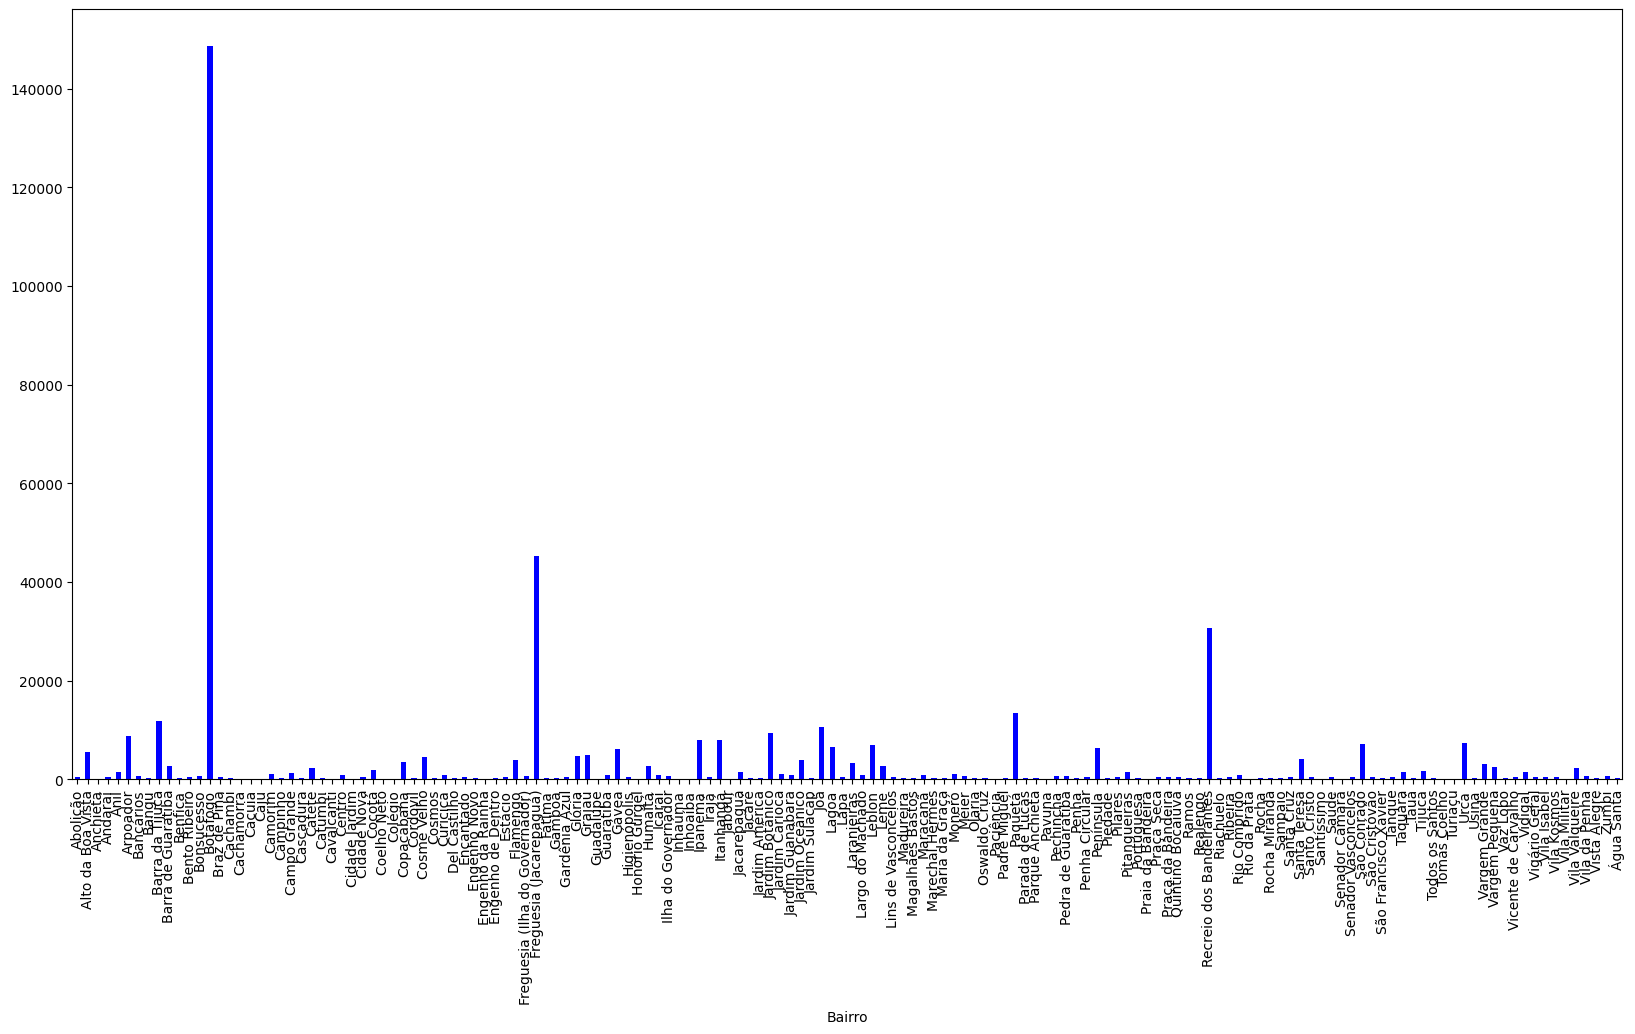

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure("Figure", figsize = (20, 10))
fig = grupo_bairros["Valor"].std().plot.bar(color = "blue")

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

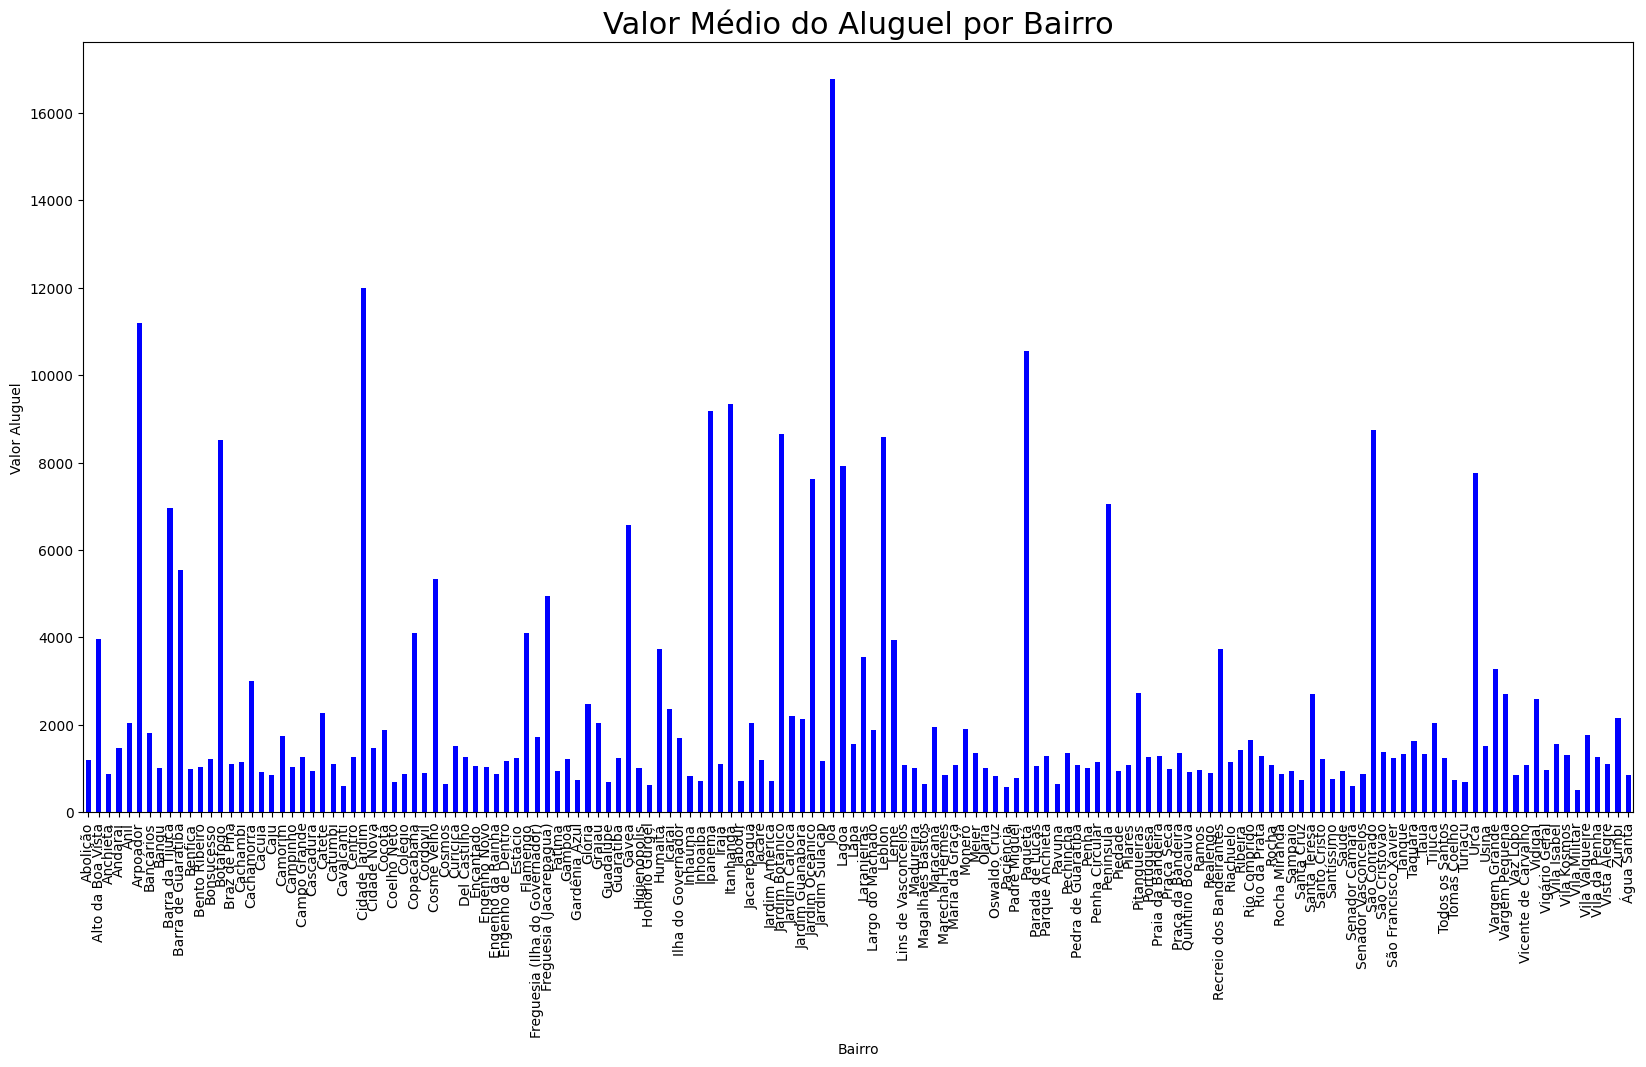

In [86]:
plt.figure("Figure", figsize = (20, 10))
fig = grupo_bairros["Valor"].mean().plot.bar(color = "blue")
fig.set_ylabel("Valor Aluguel")
fig.set_title("Valor Médio do Aluguel por Bairro", {"fontsize": 22})

### Condomínio

In [87]:
grupo_bairros["Condominio"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,191.40,183.19,0.0,0.0,250.0,320.50,560.0
Alto da Boa Vista,6.0,885.00,552.49,65.0,727.5,760.0,1223.75,1630.0
Anchieta,4.0,19.75,39.50,0.0,0.0,0.0,19.75,79.0
Andaraí,97.0,497.71,230.17,0.0,360.0,510.0,650.00,1140.0
Anil,71.0,455.85,338.37,0.0,322.5,430.0,550.00,1650.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,48.0,276.88,236.44,0.0,16.5,300.0,451.25,755.0
Vila da Penha,104.0,232.68,209.80,0.0,0.0,210.0,327.00,780.0
Vista Alegre,16.0,210.06,109.44,0.0,150.0,195.0,265.00,500.0


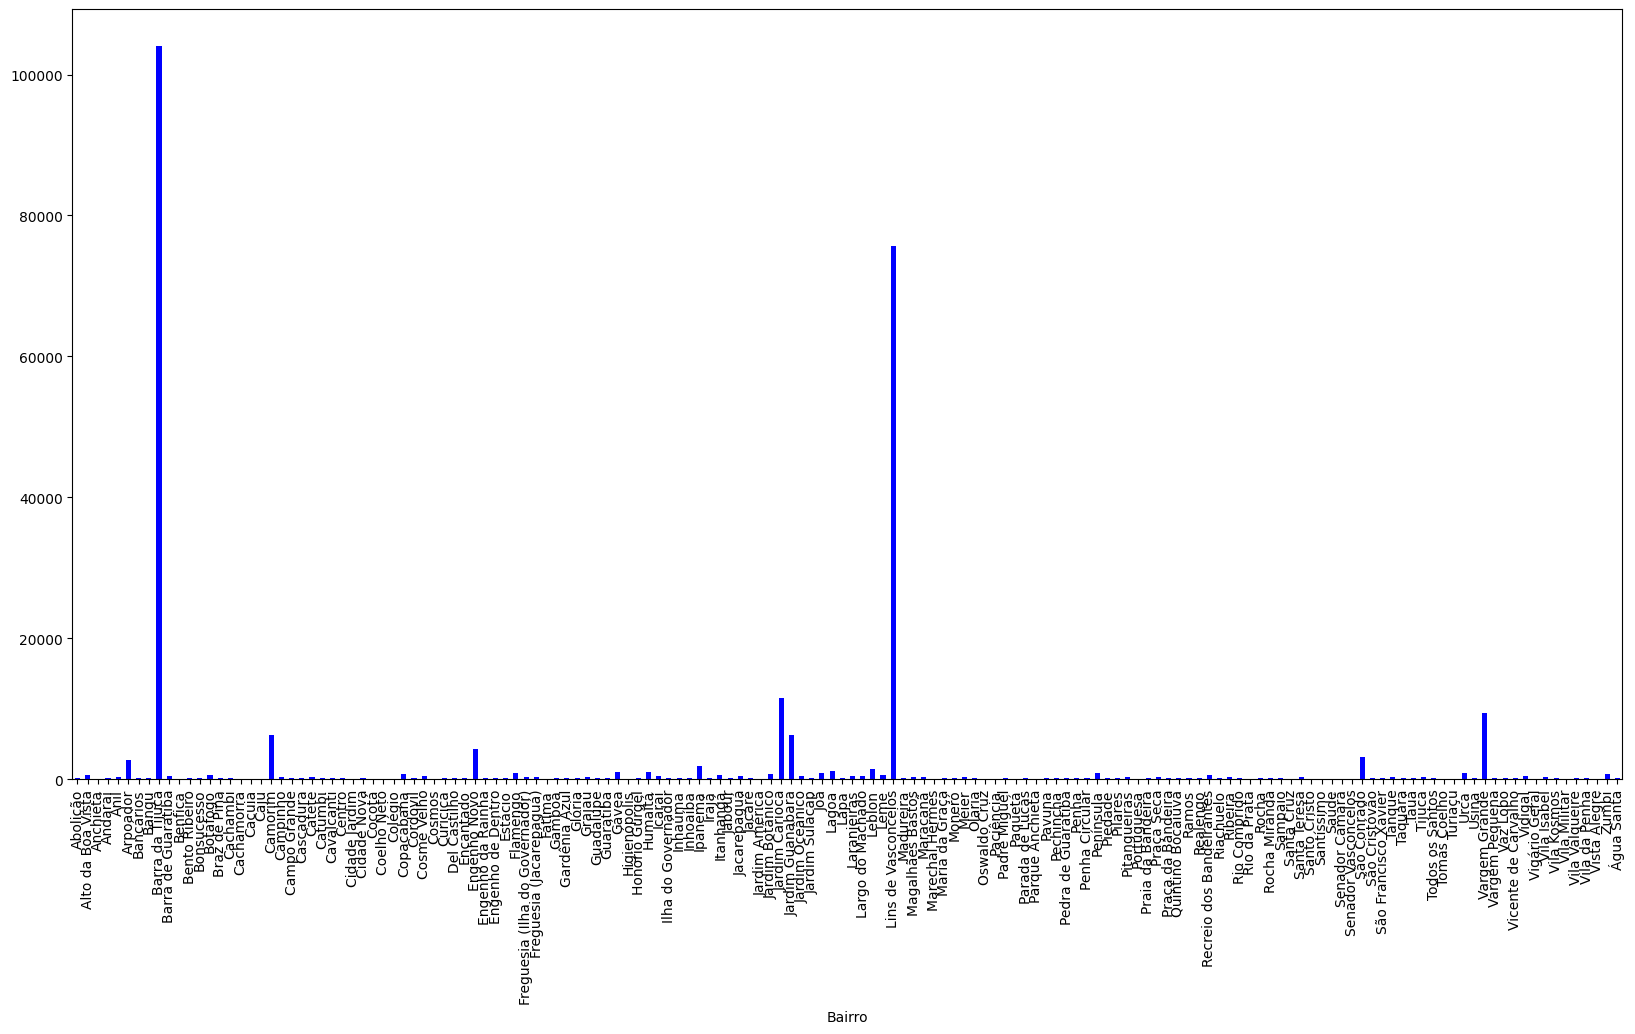

In [88]:
plt.figure("Figure", figsize = (20, 10))
fig = grupo_bairros["Condominio"].std().plot.bar(color = "blue")

Text(0.5, 1.0, 'Valor Médio do Condominio por Bairro')

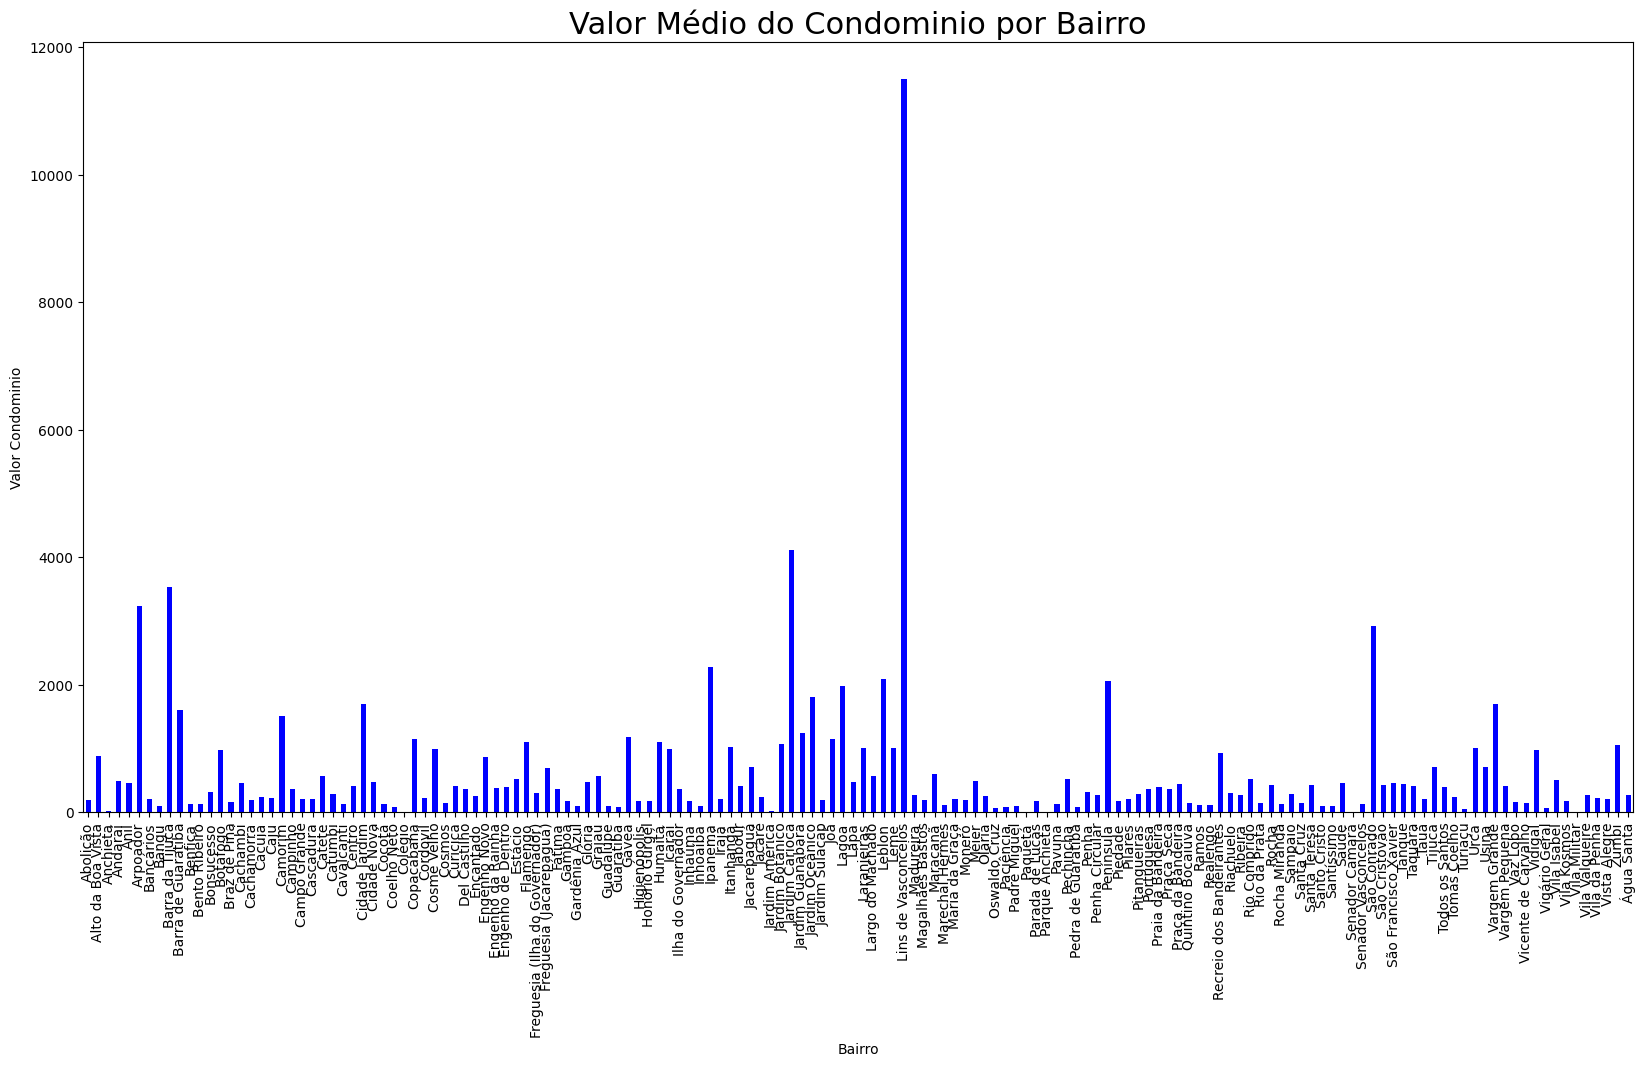

In [89]:
plt.figure("Figure", figsize = (20, 10))
fig = grupo_bairros["Condominio"].mean().plot.bar(color = "blue")
fig.set_ylabel("Valor Condominio")
fig.set_title("Valor Médio do Condominio por Bairro", {"fontsize": 22})

# Criando Faixas de Valor (EXTRA)

In [90]:
dados = pd.read_csv("dados_residenciais.csv", sep=";")
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor/M2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [94]:
classes = [0, 2, 4, 6, 100]
labels = ["0 a 2 quartos", "3 ou 4 quartos", "5 ou 6 quartos", "7 ou mais quartos"]
quartos = pd.cut(dados["Quartos"], classes, labels = labels, include_lowest = True)
quartos

0         0 a 2 quartos
1         0 a 2 quartos
2         0 a 2 quartos
3         0 a 2 quartos
4         0 a 2 quartos
              ...      
22352     0 a 2 quartos
22353     0 a 2 quartos
22354    3 ou 4 quartos
22355     0 a 2 quartos
22356     0 a 2 quartos
Name: Quartos, Length: 22357, dtype: category
Categories (4, object): ['0 a 2 quartos' < '3 ou 4 quartos' < '5 ou 6 quartos' < '7 ou mais quartos']

# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [152]:
plt.figure("Figure", figsize = (20, 10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [97]:
dados = pd.read_csv("dados_residenciais.csv", sep = ";")
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor/M2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


<Axes: >

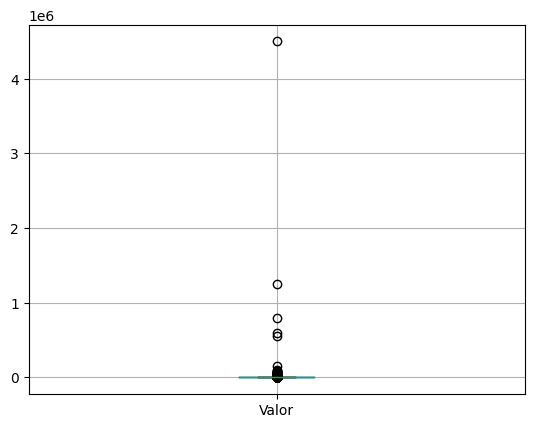

In [98]:
dados.boxplot(["Valor"])

In [101]:
Q1 = dados["Valor"].quantile(.25)
Q3 = dados["Valor"].quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

selecao = (dados["Valor"] >= limite_inferior) & (dados["Valor"] <= limite_superior)
dados_novos = dados[selecao]
dados_novos


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor/M2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
22352,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
22353,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
22354,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
22355,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


In [113]:
print(limite_superior)

11350.0


<Axes: >

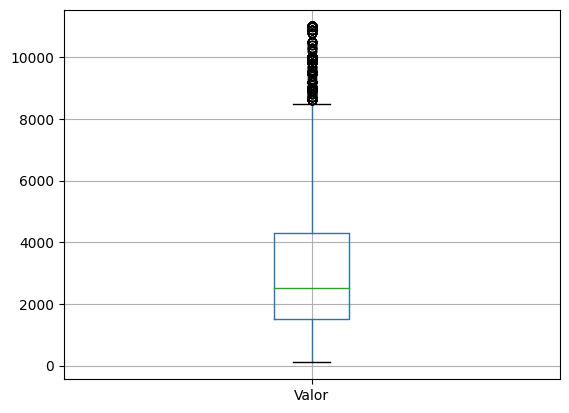

In [103]:
dados_novos.boxplot(["Valor"])

In [110]:
alto_padrao = dados_novos[dados_novos["Valor"] > 5000]
padrao = dados_novos[dados_novos["Valor"] <= 5000]

<Axes: >

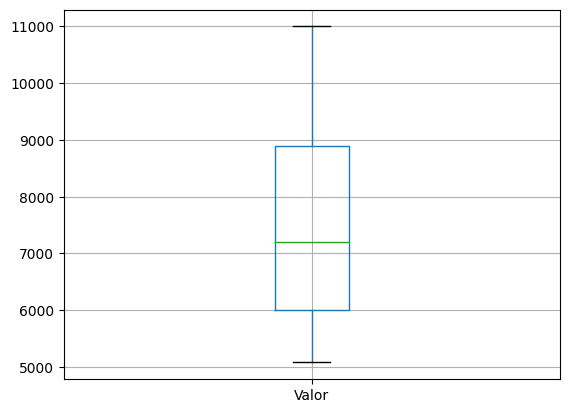

In [109]:
alto_padrao.boxplot(["Valor"])

<Axes: >

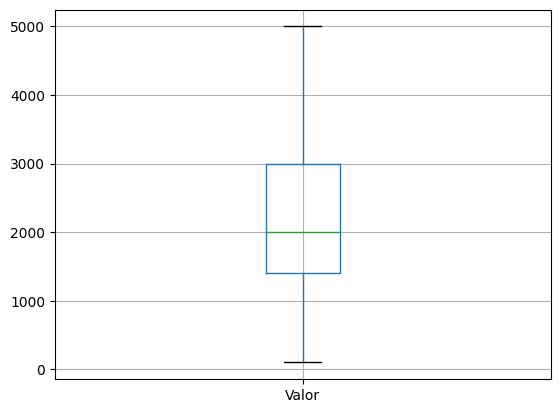

In [108]:
padrao.boxplot(["Valor"])

In [142]:
grupo_tipo = dados.groupby("Tipo")["Valor"]

In [148]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

In [147]:
dados_limpos = pd.DataFrame()
for tipo, valores in grupo_tipo:
    eh_tipo = dados["Tipo"] == tipo
    dentro_limite = (dados["Valor"] >= limite_inferior[tipo]) & (dados["Valor"] <= limite_superior[tipo])
    selecao = eh_tipo & dentro_limite
    dados_tipo = dados[selecao]
    dados_limpos = pd.concat([dados_limpos, dados_tipo])
dados_limpos

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor/M2,Tipo Agregado
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
22346,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento
22353,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
4681,Studio,Gamboa,0,0,0,110,1500.0,0.0,50.0,13.64,Apartamento
5544,Studio,Santa Teresa,1,1,0,25,1600.0,600.0,90.0,64.00,Apartamento


<Axes: title={'center': 'Valor'}, xlabel='Tipo'>

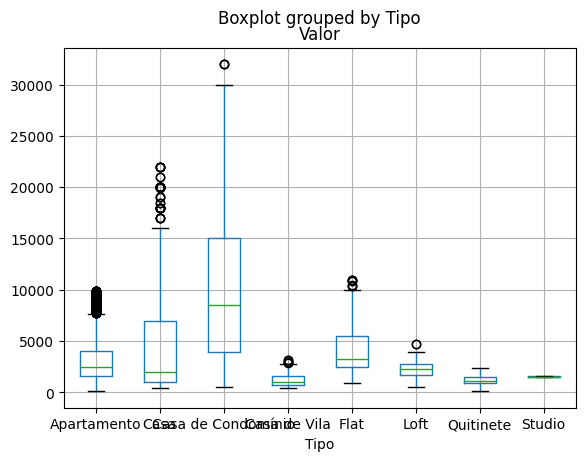

In [154]:
dados_limpos.boxplot("Valor", by = "Tipo")

In [149]:
dados_limpos.to_csv("dados_residenciais_limpos.csv", sep=";")

# Mais sobre gráficos (EXTRA)

In [155]:
dados = pd.read_csv("dados_residenciais_limpos.csv", sep=";")
dados.head()

,Unnamed: 0,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor/M2,Tipo Agregado
0,2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento


Text(0.5, 1.0, 'Valor Médio por Tipo')

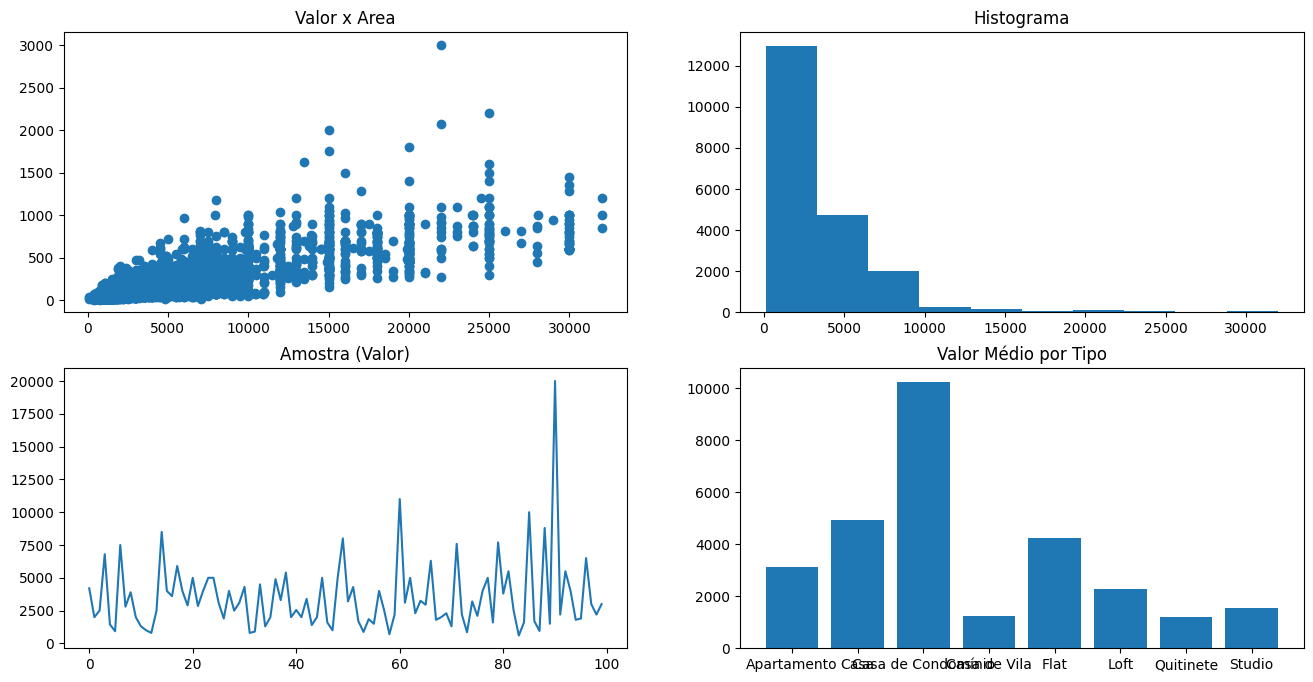

In [164]:
area = plt.figure(figsize = (16,8))

g1 = area.add_subplot(2,2,1)
g1.scatter(dados.Valor, dados.Area)
g1.set_title("Valor x Area")

g2 = area.add_subplot(2,2,2)
g2.hist(dados.Valor)
g2.set_title("Histograma")

g3 = area.add_subplot(2,2,3)
dados_g3 = dados.Valor.sample(100)
dados_g3.index = range(dados_g3.shape[0])
g3.plot(dados_g3)
g3.set_title("Amostra (Valor)")

g4 = area.add_subplot(2,2,4)
grupo = dados.groupby("Tipo")["Valor"]
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title("Valor Médio por Tipo")